In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('C:/USERS/YASHN/CUSTOMER CHURN PREDICTION.CSV')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Checking Dimensions
df.shape



(7043, 21)

In [4]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in our dataset

<function matplotlib.pyplot.show(close=None, block=None)>

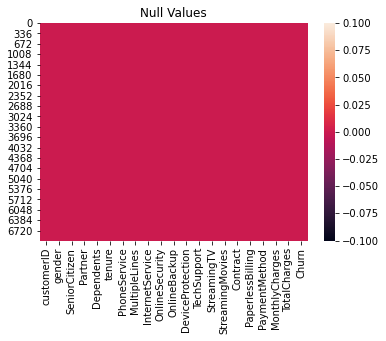

In [6]:
# plotting heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

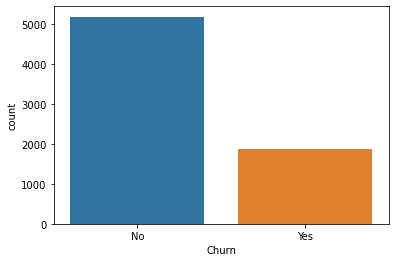

In [8]:
sns.countplot(df['Churn'])

In [9]:
df.query("TotalCharges == ' '").TotalCharges.count()

11

In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df.dropna(inplace = True);

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
# Statistical Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# Checking Correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<AxesSubplot:>

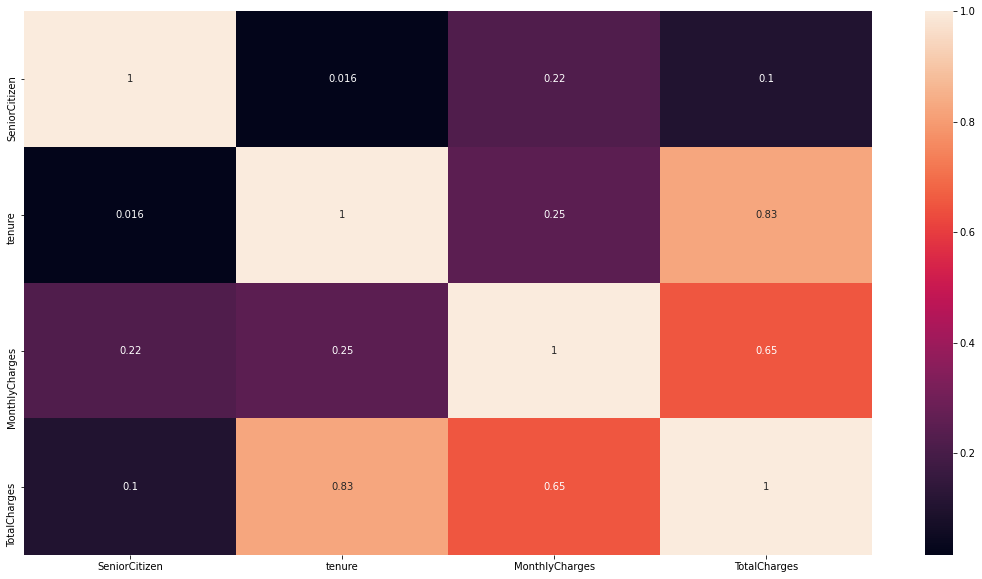

In [15]:
# Plotting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

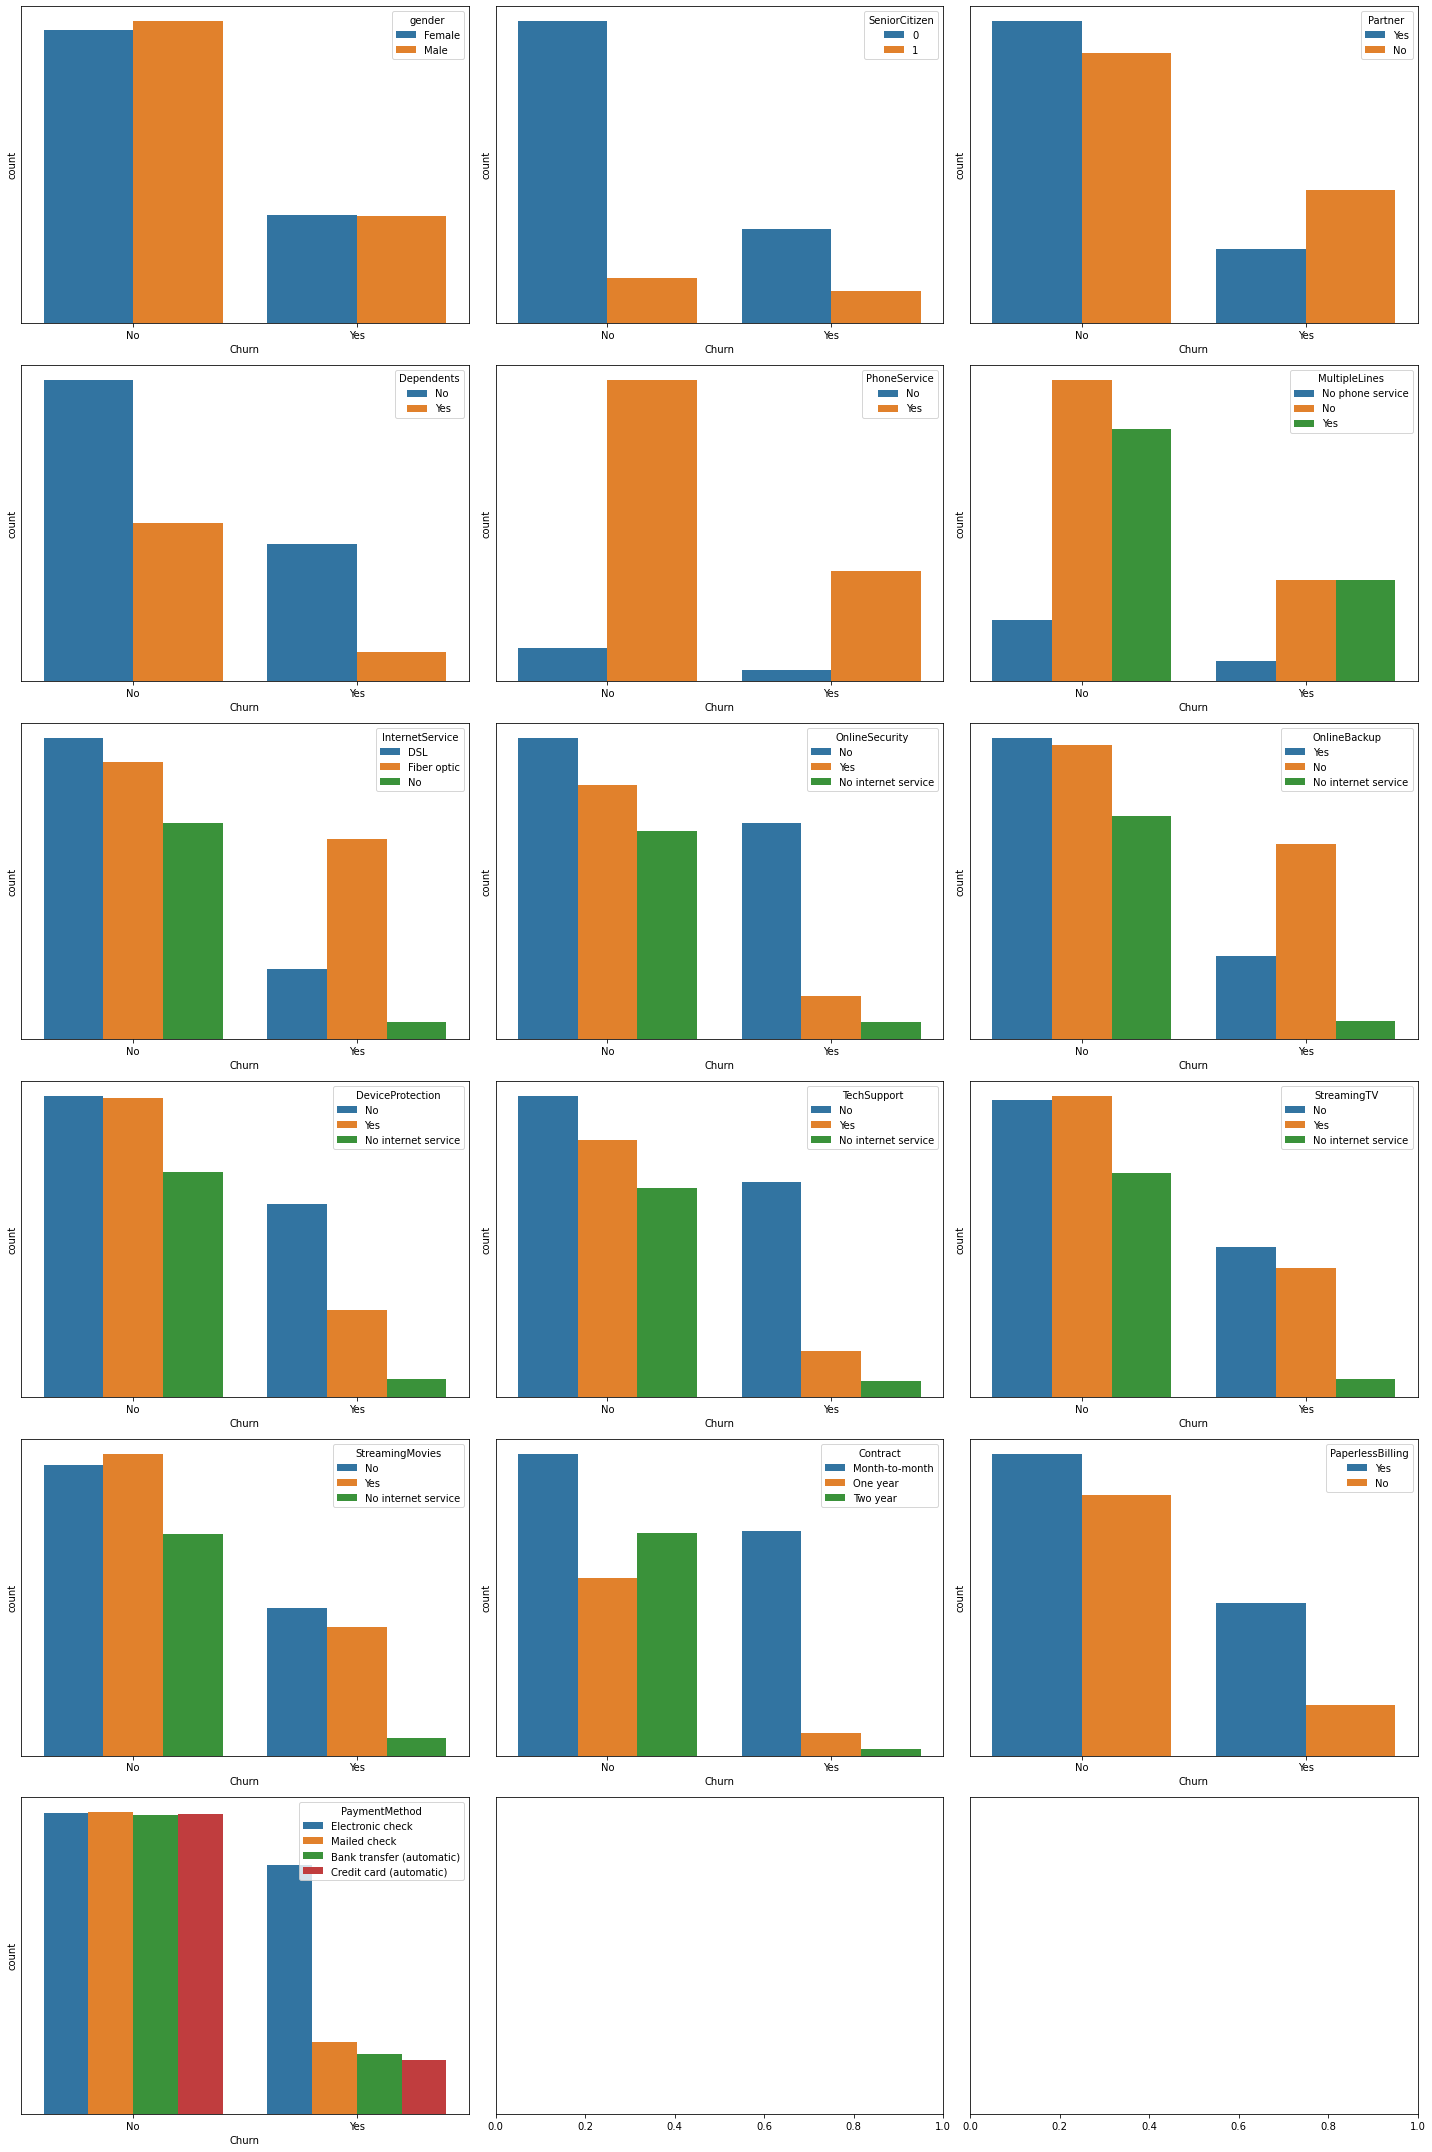

In [16]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(df["Churn"],hue = df["gender"],ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],ax = axes[5,0])


plt.setp(axes, yticks=[])
plt.tight_layout()

In [17]:
# Checking the unique values
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,2,142,74,0
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
3,5524,1,0,0,0,44,0,1,0,2,...,2,2,0,0,1,0,0,266,3570,0
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1


<AxesSubplot:>

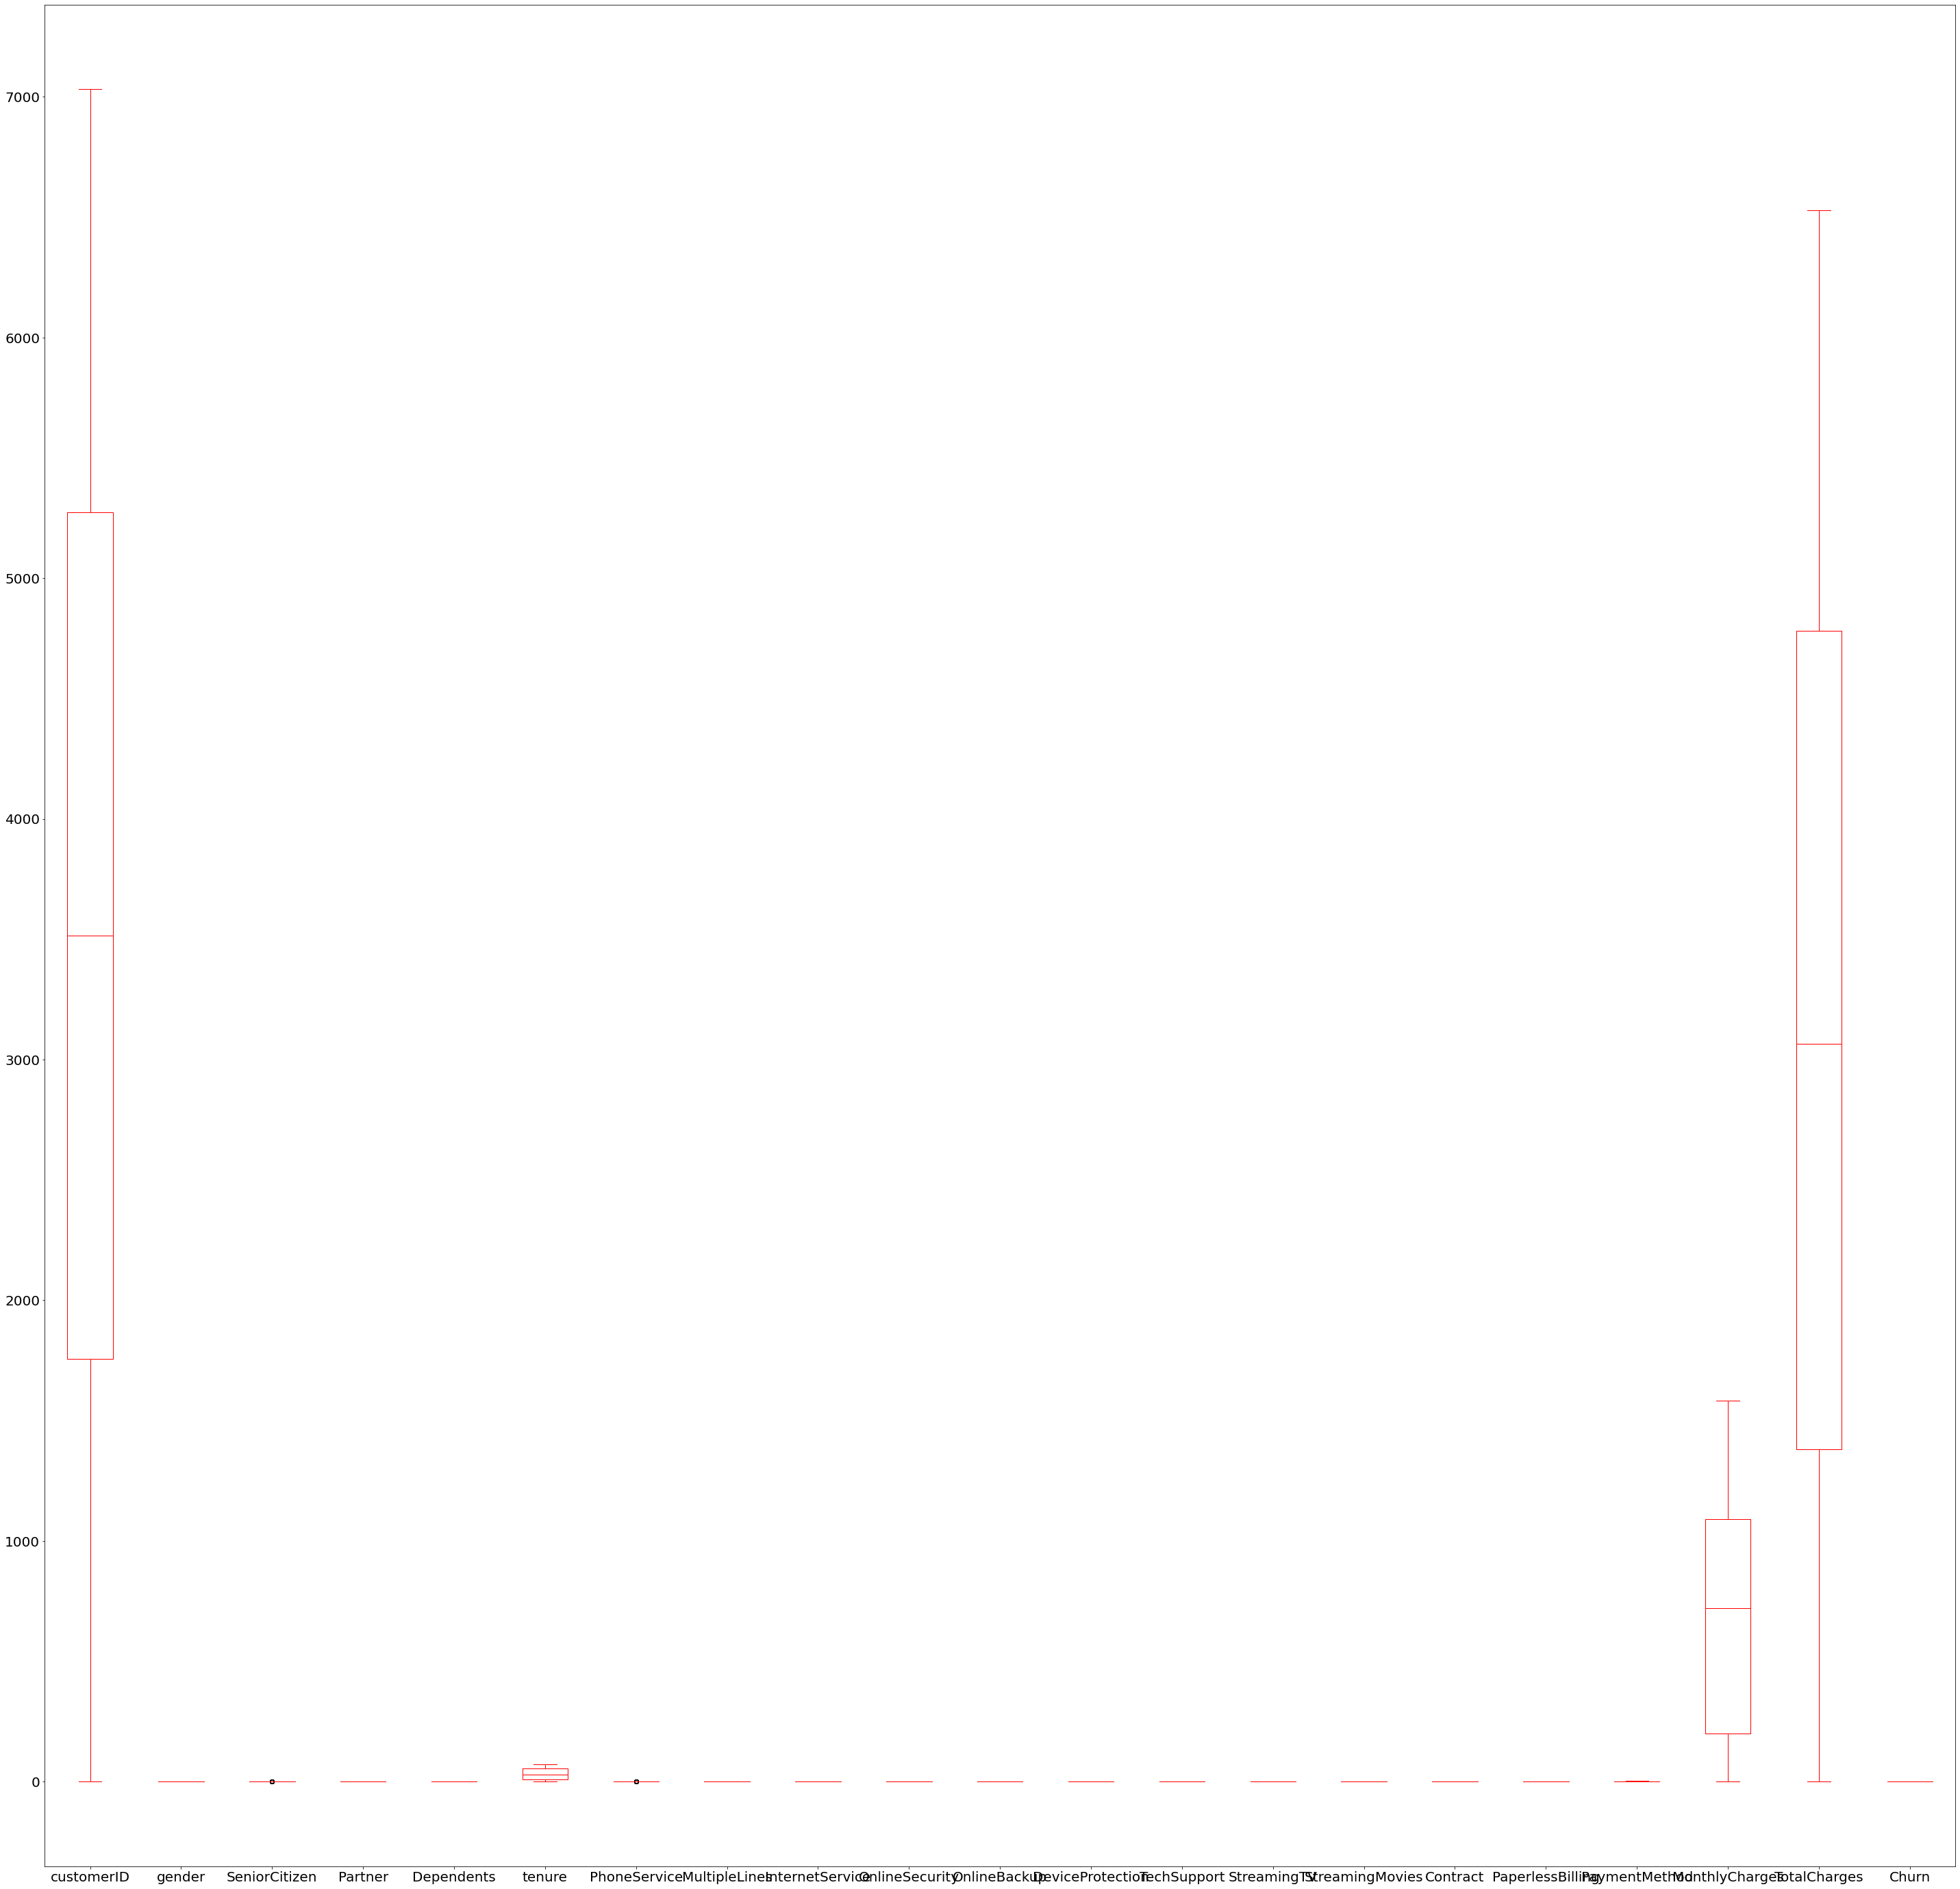

In [19]:
# Checking outliers
df.plot(kind = 'box',figsize =(50,50),fontsize =20 ,color ='r')

In [20]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91110011, 1.00943013, 0.44032709, ..., 1.13257905, 1.55819348,
        0.60166339],
       [0.21552111, 0.99065797, 0.44032709, ..., 0.39000277, 0.26923383,
        0.60166339],
       [0.47168335, 0.99065797, 0.44032709, ..., 0.51969215, 1.32037054,
        1.66205891],
       ...,
       [0.0775876 , 1.00943013, 0.44032709, ..., 1.14303787, 0.94510448,
        0.60166339],
       [1.1859819 , 0.99065797, 2.27103902, ..., 0.23125119, 1.00069946,
        1.66205891],
       [0.63769619, 0.99065797, 0.44032709, ..., 1.47166735, 1.56953843,
        0.60166339]])

In [21]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 7031, 7031, 7031], dtype=int64), array([ 0,  1,  2, ..., 18, 19, 20], dtype=int64))


In [22]:
z[6][8]

0.17283539015269764

In [23]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3953,1,0,0,0,33,1,0,0,2,...,2,0,0,0,1,0,3,497,3624,0
2,2558,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,435,536,1
4,6500,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,728,674,1
5,6540,0,0,0,0,7,1,2,1,0,...,2,0,2,2,0,1,2,1273,2173,1
6,1001,1,0,0,1,21,1,2,1,0,...,0,0,2,0,0,1,1,1074,3673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1756,0,0,0,0,71,1,0,2,1,...,1,1,1,1,2,1,0,52,3100,0
7038,4843,1,0,1,1,23,1,2,0,2,...,2,2,2,2,1,1,3,990,3700,0
7039,1524,0,0,1,1,71,1,2,1,0,...,2,0,2,2,1,1,1,1339,6304,0
7041,5923,1,1,1,0,3,1,2,1,0,...,0,0,0,0,0,1,3,794,1157,1


In [24]:
df_new.shape

(6352, 21)

In [25]:
# Checking the percentage of loss data
loss_percent =(7043-6352)/7043*100
print(loss_percent)

9.811160017038194


After the removal of outliers, we have lost 9.8 % of our data.

In [26]:
# Checking Skewness
df_new.skew()

customerID          0.007069
gender             -0.013858
SeniorCitizen       1.821088
Partner             0.057973
Dependents          0.881771
tenure              0.236305
PhoneService        0.000000
MultipleLines       0.131929
InternetService     0.049796
OnlineSecurity      0.423083
OnlineBackup        0.169109
DeviceProtection    0.183866
TechSupport         0.410861
StreamingTV        -0.002434
StreamingMovies    -0.010346
Contract            0.633437
PaperlessBilling   -0.388846
PaymentMethod      -0.168578
MonthlyCharges     -0.167518
TotalCharges        0.042838
Churn               1.050872
dtype: float64

In [27]:
# Splitting the Dataset
x = df_new.drop("Churn",axis=1)
y = df_new["Churn"]


In [28]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [29]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.217770,0.993097,-0.441965,-0.971440,-0.652054,0.061633,0.0,-0.936223,-1.35076,1.436984,-1.051821,1.262685,-0.934359,-1.147992,-1.152706,0.372688,-1.213093,1.337677,-0.475316,0.238170
1,-0.469316,0.993097,-0.441965,-0.971440,-0.652054,-1.240225,0.0,-0.936223,-1.35076,1.436984,1.252824,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,1.337677,-0.604039,-1.332008
2,1.472256,-1.006951,-0.441965,-0.971440,-0.652054,-1.240225,0.0,-0.936223,0.04755,-0.928937,-1.051821,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,0.401377,0.004281,-1.261838
3,1.491957,-1.006951,-0.441965,-0.971440,-0.652054,-0.996127,0.0,1.068121,0.04755,-0.928937,-1.051821,1.262685,-0.934359,1.145104,1.140431,-0.827168,0.824339,0.401377,1.135798,-0.499630
4,-1.236193,0.993097,-0.441965,-0.971440,1.533616,-0.426564,0.0,1.068121,0.04755,-0.928937,1.252824,-1.044067,-0.934359,1.145104,-1.152706,-0.827168,0.824339,-0.534924,0.722639,0.263086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,-0.864329,-1.006951,-0.441965,-0.971440,-0.652054,1.607590,0.0,-0.936223,1.44586,0.254024,0.100502,0.109309,0.246510,-0.001444,-0.006137,1.572545,0.824339,-1.471224,-1.399216,-0.028272
6348,0.656126,0.993097,-0.441965,1.029399,1.533616,-0.345198,0.0,1.068121,-1.35076,1.436984,-1.051821,1.262685,1.427380,1.145104,1.140431,0.372688,0.824339,1.337677,0.548240,0.276815
6349,-0.978597,-1.006951,-0.441965,1.029399,1.533616,1.607590,0.0,1.068121,0.04755,-0.928937,1.252824,1.262685,-0.934359,1.145104,1.140431,0.372688,0.824339,-0.534924,1.272826,1.600890
6350,1.188063,0.993097,2.262622,1.029399,-0.652054,-1.158859,0.0,1.068121,0.04755,-0.928937,-1.051821,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,1.337677,0.141309,-1.016244


In [30]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6352, dtype: int32

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
Vif["Features"]=X.columns
Vif

,vif_Features,Features
0,1.002922,customerID
1,1.002122,gender
2,1.152294,SeniorCitizen
3,1.472897,Partner
4,1.384535,Dependents
5,14.174574,tenure
6,NaN,PhoneService
7,1.427266,MultipleLines
8,1.549300,InternetService
9,1.252360,OnlineSecurity


we can observe multi collinearity in Tenure and Total Charges.

In [32]:
X = X.drop(["tenure","TotalCharges"],axis=1)

In [33]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.217770,0.993097,-0.441965,-0.97144,-0.652054,0.0,-0.936223,-1.35076,1.436984,-1.051821,1.262685,-0.934359,-1.147992,-1.152706,0.372688,-1.213093,1.337677,-0.475316
1,-0.469316,0.993097,-0.441965,-0.97144,-0.652054,0.0,-0.936223,-1.35076,1.436984,1.252824,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,1.337677,-0.604039
2,1.472256,-1.006951,-0.441965,-0.97144,-0.652054,0.0,-0.936223,0.04755,-0.928937,-1.051821,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,0.401377,0.004281
3,1.491957,-1.006951,-0.441965,-0.97144,-0.652054,0.0,1.068121,0.04755,-0.928937,-1.051821,1.262685,-0.934359,1.145104,1.140431,-0.827168,0.824339,0.401377,1.135798
4,-1.236193,0.993097,-0.441965,-0.97144,1.533616,0.0,1.068121,0.04755,-0.928937,1.252824,-1.044067,-0.934359,1.145104,-1.152706,-0.827168,0.824339,-0.534924,0.722639


In [34]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.002723,customerID
1,1.001643,gender
2,1.149501,SeniorCitizen
3,1.413050,Partner
4,1.381372,Dependents
5,NaN,PhoneService
6,1.360107,MultipleLines
7,1.421098,InternetService
8,1.227608,OnlineSecurity
9,1.158862,OnlineBackup


Now, there is no multi collinearity seen in our dataset.

In [35]:
# Finding Best Random State
maxAccu = 0
maxRS = 0
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy is ", maxAccu, " on Random_state", maxRS)

Best accuracy is  0.8124590163934426  on Random_state 4


In [36]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=50)

In [37]:
x_train.shape

(4954, 20)

In [38]:
y_train.shape

(4954,)

In [39]:
x_test.shape

(1398, 20)

In [40]:
y_test.shape

(1398,)

In [41]:
def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)

In [42]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 0.37558143717520215
R2 Score is: 28.144169632441717
Cross Validation Score: 29.85925229195668


In [43]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x, y)

RMSE Score is: 0.37558143717520215
R2 Score is: 28.144169632441717
Cross Validation Score: 29.85925229195668


In [44]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, x, y)

RMSE Score is: 0.47135644454116543
R2 Score is: -13.175565218009577
Cross Validation Score: -11.494458081064742


In [45]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, x, y)

RMSE Score is: 0.38969381379152473
R2 Score is: 22.64279019366309
Cross Validation Score: 25.207292226241794


In [46]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 81.47%


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7914816310052483
Testing accuracy : 0.8175965665236051
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1029
           1       0.68      0.59      0.63       369

    accuracy                           0.82      1398
   macro avg       0.77      0.74      0.75      1398
weighted avg       0.81      0.82      0.81      1398

[[925 104]
 [151 218]]


In [48]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.748211731044349


In [49]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1029
           1       0.52      0.55      0.54       369

    accuracy                           0.75      1398
   macro avg       0.68      0.68      0.68      1398
weighted avg       0.75      0.75      0.75      1398

[[843 186]
 [166 203]]


In [50]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8161659513590844


In [51]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1029
           1       0.70      0.53      0.61       369

    accuracy                           0.82      1398
   macro avg       0.77      0.73      0.74      1398
weighted avg       0.81      0.82      0.81      1398

[[944  85]
 [172 197]]


In [52]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.7834073475979006
Testing accuracy : 0.8082975679542204


In [53]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1029
           1       0.77      0.39      0.52       369

    accuracy                           0.81      1398
   macro avg       0.79      0.68      0.70      1398
weighted avg       0.80      0.81      0.79      1398

[[985  44]
 [224 145]]


From the above models we can see that Random Forest has the best accuracy score of 81 %

In [54]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [56]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [57]:
rf_randomized.best_params_

{'n_estimators': 822,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [58]:
rf_final=rf_randomized.best_estimator_

In [59]:
y_pred_random=rf_final.predict(x_test)

In [60]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred)
auc

0.6750969842059937

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [62]:
fpr

array([0.        , 0.04275996, 1.        ])

In [63]:
tpr

array([0.        , 0.39295393, 1.        ])

In [64]:
thresholds

array([2, 1, 0])

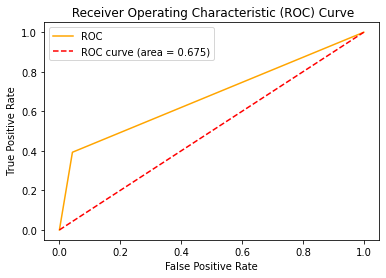

In [65]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='red', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [66]:
# Saving The model
import pickle
file = 'CUSTOMER CHURN.pkl'
#save file
save = pickle.dump(RandomForestClassifier,open(file,'wb'))

In [67]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1393,0,0
1394,0,0
1395,0,0
1396,0,1
